In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [34]:
dataset = pd.read_csv('Position_Salaries.csv')

In [35]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)

In [36]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [37]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [38]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

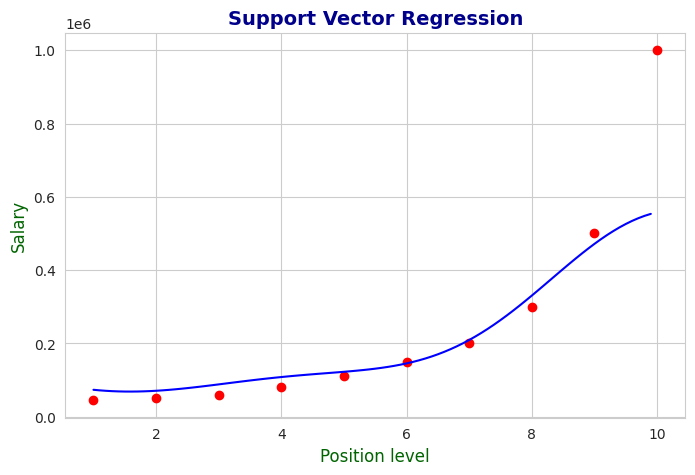

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
X_grid = np.arange(sc_X.inverse_transform(X).min(), sc_X.inverse_transform(X).max(), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color='blue')
plt.title('Support Vector Regression', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Position level', fontsize=12, color='darkgreen')
plt.ylabel('Salary', fontsize=12, color='darkgreen')
plt.show()